In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree





In [62]:
df = pd.read_csv('/content/lendingclub.csv')
df.head()

,home_ownership,income,dti,fico,loan_status
0,1,43.0,39.66,670,0
1,1,80.0,39.54,685,1
2,0,30.0,39.52,695,1
3,1,105.0,39.45,710,0
4,0,28.6,39.28,680,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_ownership  2270 non-null   int64  
 1   income          2270 non-null   float64
 2   dti             2270 non-null   float64
 3   fico            2270 non-null   int64  
 4   loan_status     2270 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 88.8 KB


<Axes: xlabel='loan_status', ylabel='count'>

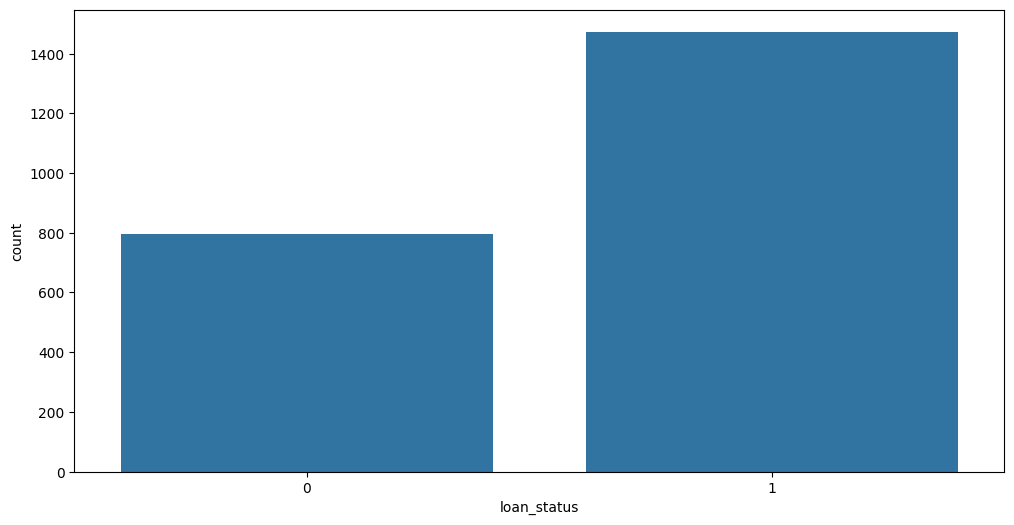

In [64]:
#1

plt.figure(figsize=(12,6))
sns.countplot(x='loan_status',data=df)

It is relatively imbalanced. By comparision the 0 class represents 35% of the observations while the 1 class represents 65% of the observation.

In [65]:
800/2300


0.34782608695652173

In [66]:
#2

X = df.drop('loan_status',axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)

In [67]:
#3.1

# initialize the classifier
dtree = DecisionTreeClassifier()


# Train the classifier
dtree.fit(X_train, y_train)


# Make predictions on the test set
predictions = dtree.predict(X_test)

In [68]:
#3.2

# Make predictions on the test set and store as y hat
y_hat = dtree.predict(X_test)

In [69]:
#3.3


# Print the classification report
print(classification_report(y_test, predictions))

# Print the confusion matrix
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.38      0.37      0.37       630
           1       0.67      0.68      0.68      1186

    accuracy                           0.57      1816
   macro avg       0.53      0.53      0.53      1816
weighted avg       0.57      0.57      0.57      1816

[[232 398]
 [376 810]]


The model is reporting a higher precision for class one indicating it is doing well at identifying positives. It has a highe rrecall for class one indicating it is effective at capturing true positives. The f1 score is higher for positive cases meaning the model is perfroming better for the positive cases. The accuracy is most likely dragged down at the models inefficiency at classifying the negative class. The model needs adjustments that will help in identifying the negative class.

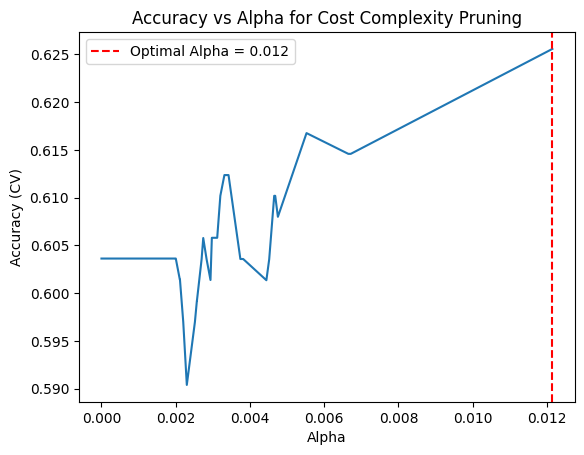

Optimal alpha: 0.012144590021696489


In [70]:
#4

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=101)

# Get the path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Define a list to store the accuracy scores
accuracy_cv = []

# Loop through the different alpha values
for ccp_alpha in ccp_alphas:
    # Create a decision tree classifier with the current alpha
    clf = DecisionTreeClassifier(random_state=101, ccp_alpha=ccp_alpha)
    # Calculate the accuracy score using cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    # Append the mean accuracy score to the list
    accuracy_cv.append(scores.mean())

# Find the optimal alpha
optimal_alpha = ccp_alphas[np.argmax(accuracy_cv)]

# Plot accuracy vs alpha
plt.plot(ccp_alphas, accuracy_cv)
plt.xlabel("Alpha")
plt.ylabel("Accuracy (CV)")
plt.title("Accuracy vs Alpha for Cost Complexity Pruning")
plt.axvline(x=optimal_alpha, linestyle='--', color='red', label=f'Optimal Alpha = {optimal_alpha:.3f}')
plt.legend()
plt.show()

print(f"Optimal alpha: {optimal_alpha}")

In [71]:
#5

# refit w optimal alpha
optimized_dtree = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=101)
optimized_dtree.fit(X_train, y_train)

# Make predictions on the test set using the optimized model
y_hat_optimized = optimized_dtree.predict(X_test)

In [72]:
#6

# Print the classification report for the optimized model
print(classification_report(y_test, y_hat_optimized))

# Print the confusion matrix for the optimized model
print(confusion_matrix(y_test, y_hat_optimized))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       630
           1       0.65      1.00      0.79      1186

    accuracy                           0.65      1816
   macro avg       0.33      0.50      0.40      1816
weighted avg       0.43      0.65      0.52      1816

[[   0  630]
 [   0 1186]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model is overfitting. There are predictions only for the positive class and the model is disregarding the negative classes which is why the cases fall within True Positives or False positives and no observations fall within the negative class.

In [73]:
#7

# Calculate accuracy scores using 5-fold cross-validation for the optimized model
optimized_accuracy_cv = cross_val_score(optimized_dtree, X_train, y_train, cv=5)

# print the accuracy scores for each fold
print("Optimized Accuracy Scores (5-fold CV):", optimized_accuracy_cv)

#estimate the optimized accuracy using the mean of the cross-validation scores
estimated_optimized_accuracy = optimized_accuracy_cv.mean()
print(f"\nEstimated Optimized Accuracy (5-fold CV): {estimated_optimized_accuracy}")

Optimized Accuracy Scores (5-fold CV): [0.62637363 0.63736264 0.59340659 0.63736264 0.63333333]

Estimated Optimized Accuracy (5-fold CV): 0.6255677655677656


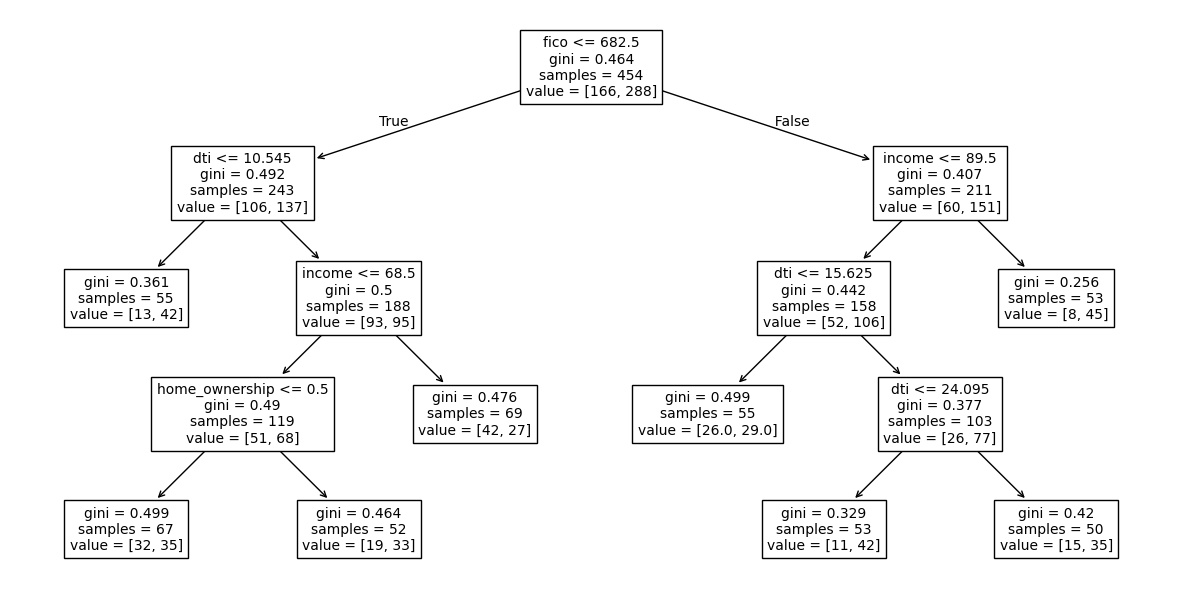

In [74]:
#8

plt.figure(figsize=(15,7.5))

#new tree with the desired parameter:
dtree_viz = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=101)
dtree_viz.fit(X_train, y_train)
# And then plot this tree:
plot_tree(dtree_viz, fontsize=10, feature_names=X.columns)
plt.show()

8.1:

The tree starts with fico <= 682.5 as the most informative split.

8.2:

For fico <= 682.5 and dti <= 10.545, the terminal node has gini = 0.361, samples = 55, and value = [13, 42], indicating a likely "good condition" outcome.

8.3:

There are 8 terminal nodes, fewer than 16 because the tree stops splitting when impurity reduction is minimal or other criteria are met.

8.4:

Gini values range from 0.256 to 0.499, showing moderate purity. These values are acceptable, though further tuning could improve purity.